In [8]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from matplotlib.pyplot import figure
import glob

# Chinese massive

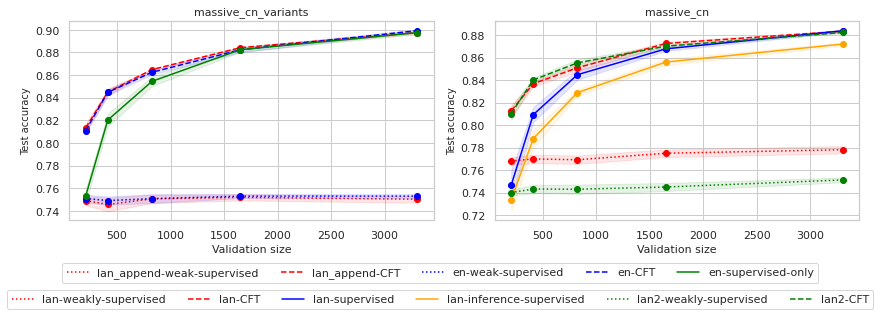

In [47]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Dataset metadata
dataset_metadata = {
    'massive18': {"train_size": 11514, "val_size": 2033, 'metric': 'acc'},
    'massive_en': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_cn': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_cn2': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_nb': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_nb2': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_ja2': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_ja': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_cn_append': {"train_size": 23128, "val_size": 3305, 'metric': 'acc'},
    'massive_nb_append': {"train_size": 23128, "val_size": 3305, 'metric': 'acc'},
    'massive_ja_append': {"train_size": 23128, "val_size": 3305, 'metric': 'acc'},
    'massive_nb_inference': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_cn_inference': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_ja_inference': {"train_size": 11564, "val_size": 3305, 'metric': 'acc'},
    'massive_nb_append2': {"train_size": 23128, "val_size": 3305, 'metric': 'acc'},
    'massive_highcad': {"train_size": 11514, "val_size": 2033, 'metric': 'acc'},
}

result_directory = "./results"
N_RUNS = 5
PERCENT_TRIAL = 1

pip_to_style = {'val_as_train': 'solid',
                'fine_tune_on_val': 'dotted',
                'fine_tune_on_val_after' : 'dashed'}

legend_name = {'val_as_train': 'supervised',
               'fine_tune_on_val': 'weak supervised',
               'fine_tune_on_val_after' : 'CFT'}

dataset_to_color = {
    'massive_cn_append': 'red',
    'massive_cn_inference': 'orange',
    'massive_cn': 'red',
    'massive_cn2': 'green',
    'massive_en': 'blue',
}

polt_files = {
    "massive_cn_variants": [
        "results/massive_cn_append/massive_cn_append-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"
    ],
    "massive_cn": [
        "results/massive-CN/massive_cn-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-CN/massive_cn-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive_cn_inference/massive_cn_inference-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-CN2/massive_cn2-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(3).json"
    ]
}

# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot each dataset
counter_y = 0
for name, files in polt_files.items():
    ax = axs[counter_y]
    counter_y += 1
    
    for filepath in files:
        with open(filepath) as f:
            file = (filepath[3:]).split("/")[2].split('.')[0].split("-")
            dataset_name, pip, LM, EM = file[:4]

            result_dict = json.load(f)
            x = np.array(list(result_dict.keys())).astype(float) * dataset_metadata[dataset_name]['val_size']
            em_test = [result_dict[k]["em_test"] for k in result_dict]
            em_test_mean, em_test_std = zip(*[list(v.values())[0] for v in em_test])
            em_test_se = np.array(em_test_std) / np.sqrt(N_RUNS)

            color = dataset_to_color[dataset_name]
            
            if name in ['massive_cn'] and filepath in ["results/massive-CN/massive_cn-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"]:
                if pip == 'val_as_train':
                    color = 'blue'
            if name in ["massive_cn_variants"] and filepath in ["results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"]:
                if pip == 'val_as_train':
                    color = 'green'

            ax.plot(x, em_test_mean, label=f"{dataset_name}-{legend_name[pip]}", color=color, linestyle=pip_to_style[pip], marker='o')
            ax.fill_between(x, np.array(em_test_mean) - 1 * em_test_se, np.array(em_test_mean) + 1 * em_test_se, alpha=0.1, color=color)
            
            if pip == 'fine_tune_on_val':
                pip = 'fine_tune_on_val_after'
                tuned_em_test = [result_dict[k]["tuned_em_test"] for k in result_dict]
                tuned_em_test_mean, tuned_em_test_std = zip(*[list(v.values())[0] for v in tuned_em_test])
                tuned_em_test_se = np.array(tuned_em_test_std) / np.sqrt(N_RUNS)
                ax.plot(x, tuned_em_test_mean, label=f"{dataset_name}-{legend_name[pip]}", color=color, linestyle=pip_to_style[pip], marker='o')
                ax.fill_between(x, np.array(tuned_em_test_mean) - 1 * tuned_em_test_se, np.array(tuned_em_test_mean) + 1 * tuned_em_test_se, alpha=0.1, color=color)
    
    ax.set_title(name, fontsize=11)
    ax.set_xlabel("Validation size", fontsize=11)
    ax.set_ylabel(f"Test {dataset_metadata[dataset_name]['metric']}uracy", fontsize=10)

# Create custom legends
legend_elements_cn_variants = [
    plt.Line2D([0], [0], color='red', linestyle='dotted', label='lan_append-weak-supervised'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='lan_append-CFT'),
    plt.Line2D([0], [0], color='blue', linestyle='dotted', label='en-weak-supervised'),
    plt.Line2D([0], [0], color='blue', linestyle='dashed', label='en-CFT'),
    plt.Line2D([0], [0], color='green', linestyle='solid', label='en-supervised-only')
]
legend_elements_cn = [
    plt.Line2D([0], [0], color='red', linestyle='dotted', label='lan-weakly-supervised'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='lan-CFT'),
    plt.Line2D([0], [0], color='blue', linestyle='solid', label='lan-supervised'),
    plt.Line2D([0], [0], color='orange', linestyle='solid', label='lan-inference-supervised'),
    plt.Line2D([0], [0], color='green', linestyle='dotted', label='lan2-weakly-supervised'),
    plt.Line2D([0], [0], color='green', linestyle='dashed', label='lan2-CFT')
]

# Add the legends to the figure
fig.legend(handles=legend_elements_cn_variants, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.09), fontsize=11, fancybox=True)
fig.legend(handles=legend_elements_cn, loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.01), fontsize=11, fancybox=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
plt.savefig("massive_cn.pdf")
plt.show()
